In [4]:
import pandas as pd
import os
import geopy
from geopy.distance import great_circle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#os.chdir("D:\airbnb_data")
from sklearn.preprocessing import LabelEncoder
from __future__ import division
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import  train_test_split
%matplotlib inline
#importing all packages required 

In [5]:
train = pd.read_csv('train_air.csv')
test = pd.read_csv('test_air.csv')
# importing train and test dataset

In [6]:
train.head()

,Id,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
0,0,150,f,22.0,t,-33.846469,151.205171,Apartment,Entire home/apt,2,...,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,0.53
1,1,66,f,1.0,t,-33.895736,151.173529,Apartment,Private room,2,...,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,NaN
2,2,325,t,1.0,t,-33.879322,151.222408,House,Entire home/apt,4,...,10.0,10.0,10.0,10.0,10.0,9.0,f,f,moderate,2.38
3,3,145,f,1.0,f,-33.856874,151.149600,House,Entire home/apt,6,...,10.0,10.0,10.0,10.0,10.0,10.0,f,f,flexible,1.96
4,4,200,f,6.0,t,-33.907150,151.178552,House,Entire home/apt,4,...,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate,2.73


In [7]:
train.columns

Index(['Id', 'price', 'host_is_superhost', 'host_total_listings_count',
       'host_identity_verified', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'security_deposit', 'cleaning_fee', 'extra_people', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'is_business_travel_ready', 'cancellation_policy', 'reviews_per_month'],
      dtype='object')

In [6]:
train.shape

(1000, 30)

In [8]:
test.shape

(7967, 29)

In [9]:
""" merging train and test for processing"""
data = pd.concat([train,test])
# processign train  and test seperately creates issues during one hot or dummies and creates different 
#columns which makes sklearn difficult to learn

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [10]:
data.shape

(8967, 30)

In [11]:
data.dtypes
#checking dtypes

Id                               int64
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
cancellation_policy             object
cleaning_fee                   float64
extra_people                     int64
host_identity_verified          object
host_is_superhost               object
host_total_listings_count      float64
instant_bookable                object
is_business_travel_ready        object
latitude                       float64
longitude                      float64
maximum_nights                   int64
minimum_nights                   int64
number_of_reviews                int64
price                          float64
property_type                   object
review_scores_accuracy         float64
review_scores_checkin          float64
review_scores_cleanliness      float64
review_scores_communication    float64
review_scores_location         float64
review_scores_rating     

In [12]:
""" we can see a lot of columns above are object. They should be categorical. Hence, I would capture all and
convert them into categorical"""
char_cols = data.dtypes.pipe(lambda x: x[x == 'object']).index
#identifying the charecter / categorical columns

In [13]:
print(char_cols)
#got all categorical variables names in single list

Index(['cancellation_policy', 'host_identity_verified', 'host_is_superhost',
       'instant_bookable', 'is_business_travel_ready', 'property_type',
       'room_type'],
      dtype='object')


In [14]:
for c in char_cols:
    data[c]= data[c].astype('category')
# converting into categorical variables 

In [19]:
data.dtypes
#checking the conversion. 

Id                                int64
accommodates                      int64
bathrooms                       float64
bedrooms                        float64
beds                            float64
cancellation_policy            category
cleaning_fee                    float64
extra_people                      int64
host_identity_verified         category
host_is_superhost              category
host_total_listings_count       float64
instant_bookable               category
is_business_travel_ready       category
latitude                        float64
longitude                       float64
maximum_nights                    int64
minimum_nights                    int64
number_of_reviews                 int64
price                           float64
property_type                  category
review_scores_accuracy          float64
review_scores_checkin           float64
review_scores_cleanliness       float64
review_scores_communication     float64
review_scores_location          float64


In [15]:
#data.isnull().any()
data.isnull().sum()
# checking missing values

Id                                0
accommodates                      0
bathrooms                        11
bedrooms                          5
beds                             13
cancellation_policy               0
cleaning_fee                   2844
extra_people                      0
host_identity_verified           14
host_is_superhost                14
host_total_listings_count        14
instant_bookable                  0
is_business_travel_ready          0
latitude                          0
longitude                         0
maximum_nights                    0
minimum_nights                    0
number_of_reviews                 0
price                          7967
property_type                     0
review_scores_accuracy         2826
review_scores_checkin          2838
review_scores_cleanliness      2822
review_scores_communication    2827
review_scores_location         2838
review_scores_rating           2806
review_scores_value            2841
reviews_per_month           

### interpretation of missing values
All review scores related variables have missing values. Hence I would impute them. 
Security deposit is missing for many. 
Price is missing for 7967. 

There are multiple ways to impute 
   1. Impute with fixed value 
   2. Impute with mean/ median/ mode of column
   3. KNN imputation
   
This code chose to impute with fixed value '0' 

In [20]:
data.loc[:,['bathrooms','bedrooms','beds','cleaning_fee','host_total_listings_count','price','review_scores_accuracy','review_scores_checkin','review_scores_cleanliness','review_scores_communication','review_scores_location','review_scores_rating','review_scores_value','reviews_per_month','security_deposit']]= data.loc[:,['bathrooms','bedrooms','beds','cleaning_fee','host_total_listings_count','price','review_scores_accuracy','review_scores_checkin','review_scores_cleanliness','review_scores_communication','review_scores_location','review_scores_rating','review_scores_value','reviews_per_month','security_deposit']].fillna(0)

In [21]:
data.isnull().any()
#We used fill na and replaced missing values with 0. 

Id                             False
accommodates                   False
bathrooms                      False
bedrooms                       False
beds                           False
cancellation_policy            False
cleaning_fee                   False
extra_people                   False
host_identity_verified          True
host_is_superhost               True
host_total_listings_count      False
instant_bookable               False
is_business_travel_ready       False
latitude                       False
longitude                      False
maximum_nights                 False
minimum_nights                 False
number_of_reviews              False
price                          False
property_type                  False
review_scores_accuracy         False
review_scores_checkin          False
review_scores_cleanliness      False
review_scores_communication    False
review_scores_location         False
review_scores_rating           False
review_scores_value            False
r

"Host_identitity_verified" and "host_is_superhost" are caetgorical variables. fillna() works doesn't work for them. 
Categorical imputation has to be with either a mode or median or a seperate category created, added and then imputed

## Data Visualisation

"Price" is the target variable. It is a regression problem. Hence we would be exploring the data with respect to price's point of view to see which attributes are correlated to price

In [22]:
data['price_bins'] = pd.cut(data.price , bins = [0,100,200,300,600] , labels= ['low','medium','high','very_high'])
counts = data.price_bins.value_counts()
# we are doing binning of prices. Because, once binned price is categorical variable and you can get relation with 
# other categories as well.

In [24]:
#first let us check, "accomodates" variable which gives size of people in each property
data['accom_bins'] = pd.cut(data.accommodates , bins = [0,1,2,4,600] , labels= ['one','two','3&4','>4'])
#binning accomodation variable
data.head()

,Id,accommodates,bathrooms,bedrooms,beds,cancellation_policy,cleaning_fee,extra_people,host_identity_verified,host_is_superhost,...,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,security_deposit,price_bins,accom_bins
0,0,2,1.0,1.0,1.0,strict,330.0,0,t,f,...,10.0,10.0,10.0,100.0,10.0,0.53,Entire home/apt,500.0,medium,two
1,1,2,1.5,1.0,1.0,flexible,0.0,0,t,f,...,0.0,0.0,0.0,0.0,0.0,0.00,Private room,0.0,low,two
2,2,4,2.0,2.0,2.0,moderate,180.0,0,t,t,...,10.0,10.0,10.0,99.0,9.0,2.38,Entire home/apt,500.0,very_high,3&4
3,3,6,1.5,3.0,4.0,flexible,80.0,0,f,f,...,10.0,10.0,10.0,100.0,10.0,1.96,Entire home/apt,0.0,medium,>4
4,4,4,1.0,2.0,2.0,moderate,85.0,50,t,f,...,10.0,10.0,10.0,97.0,10.0,2.73,Entire home/apt,350.0,medium,3&4


In [26]:
accom = pd.crosstab(data.accom_bins,data.price_bins , margins= True)
accom.head()
# this gives how many properties are distributed in each of the varibles

price_bins,low,medium,high,very_high,All
accom_bins,,,,,
one,102,7,1,0,110
two,281,152,29,3,465
3&4,41,158,57,21,277
>4,11,33,61,43,148
All,435,350,148,67,1000


In [28]:
accom.loc[:,'low':'very_high'] = accom.loc[:,'low':'very_high'].div(accom['All'],axis = 0)*100
# we are getting % of hoses distributed across each bin

In [29]:
accom.head()

price_bins,low,medium,high,very_high,All
accom_bins,,,,,
one,92.727273,6.363636,0.909091,0.000000,110
two,60.430108,32.688172,6.236559,0.645161,465
3&4,14.801444,57.039711,20.577617,7.581227,277
>4,7.432432,22.297297,41.216216,29.054054,148
All,43.500000,35.000000,14.800000,6.700000,1000


In [30]:
del accom['All']

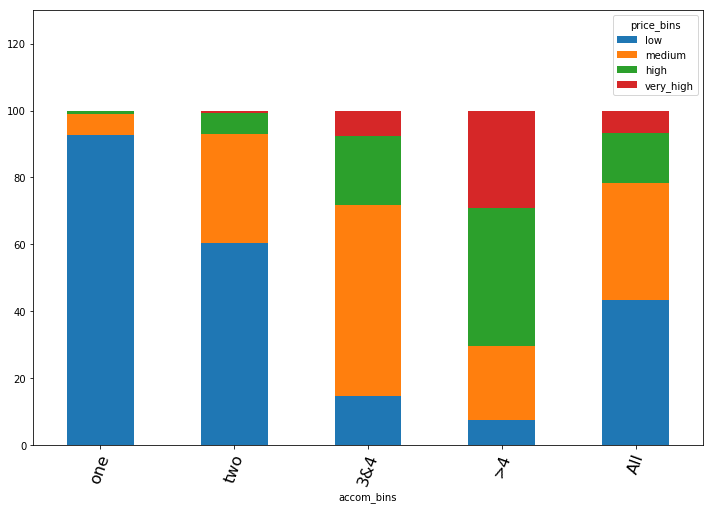

In [34]:

""" Accom plotting"""
#f, ax = plt.subplots(figsize=(14,8))
accom.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.ylim(ymax = 130)
plt.xticks(rotation=70 , fontsize= 16)
plt.show()

This gives us a lot of insights. Clearly, price and accomodation are dependent. A lot of low price properties accommodate only 1 person. Most of medium priced accomodates 3/4 persons. Althpough its evident from data, this visual proves the hypothesis. 

In [43]:
# similarly let's look at cancellation policy analysis as well
canc = pd.crosstab(data.cancellation_policy,data.price_bins)
su = canc.sum(axis = 1)
canc = canc.loc[:,'low':'very_high'].div(su,axis = 0)*100
canc

price_bins,low,medium,high,very_high
cancellation_policy,,,,
flexible,57.020057,30.372493,8.309456,4.297994
moderate,50.579151,29.729730,14.671815,5.019305
strict,26.785714,42.602041,20.663265,9.948980


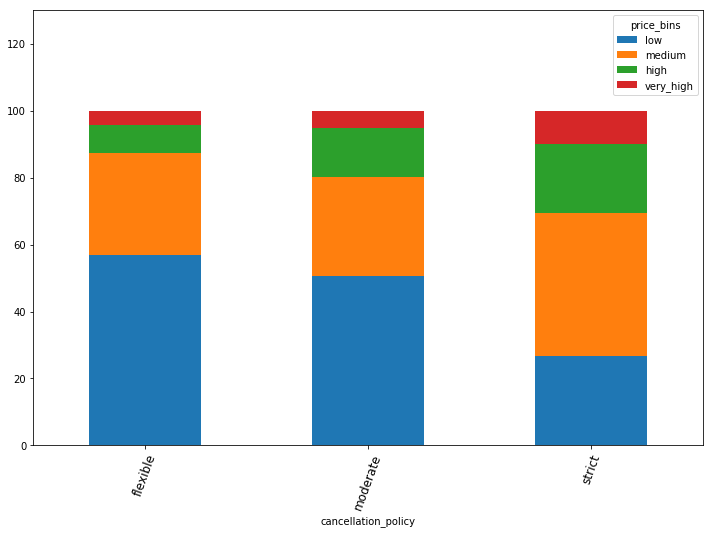

In [46]:
# plotting cancellation
canc.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.ylim(ymax = 130)
plt.xticks(rotation=70 , fontsize= 12)
plt.savefig('canc.png')
plt.show()

High pricing and very high follow strict policy for cancelling and flexible pricing houses demand only low pricing. It is counter intuitive but for us, cancellation policy is a criteria for predicting.

In [48]:
host_ver = pd.crosstab(data.host_identity_verified,data.price_bins)
su =  host_ver.sum(axis = 0)
host_ver = host_ver.loc[:,'low':'very_high'].div(su,axis = 1)*100
host_ver = host_ver.T
host_ver

host_identity_verified,f,t
price_bins,,
low,56.451613,43.548387
medium,47.851003,52.148997
high,45.270270,54.729730
very_high,44.776119,55.223881


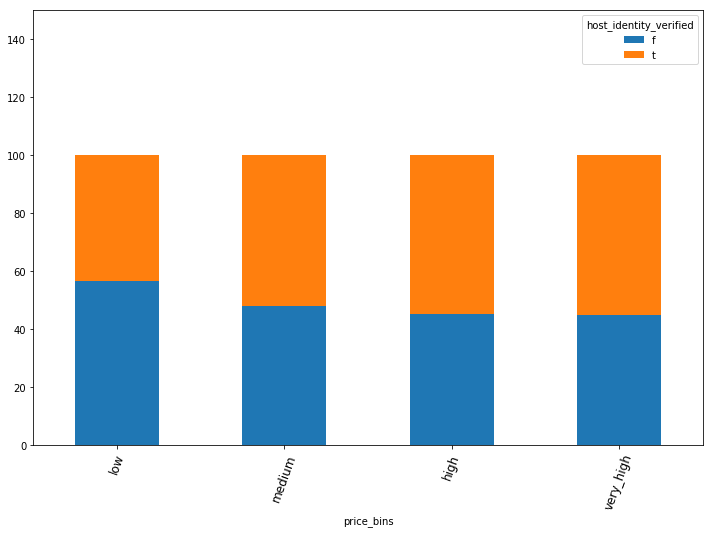

In [50]:
host_ver.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.ylim(ymax = 150)
plt.xticks(rotation=70 , fontsize= 12)

plt.show()


Host verified is not a significant criteria. Though it is verifying according to price bins. Variation isnt significant

In [51]:
"""Business travel ready %"""

b_trav = pd.crosstab(data.is_business_travel_ready,data.price_bins)
su = b_trav.sum(axis = 0)
b_trav = b_trav.loc[:,'low':'very_high'].div(su,axis = 1)*100
b_trav = b_trav.T
b_trav

is_business_travel_ready,f,t
price_bins,,
low,99.310345,0.689655
medium,96.285714,3.714286
high,95.945946,4.054054
very_high,97.014925,2.985075


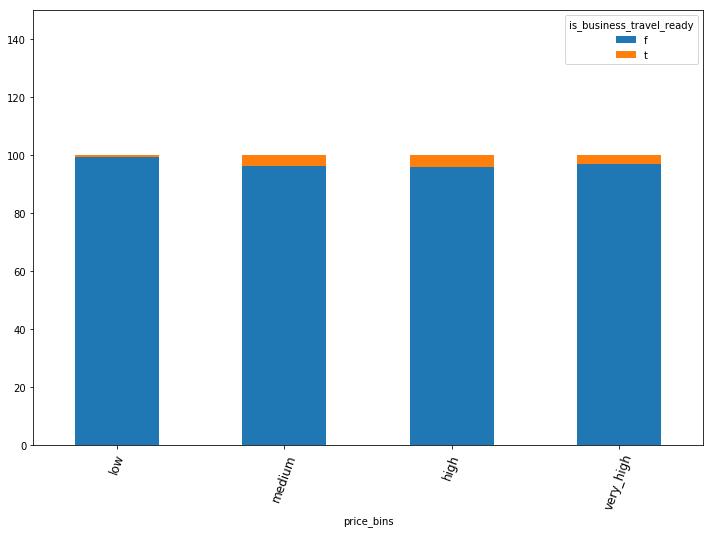

In [52]:
b_trav.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.ylim(ymax = 150)
plt.xticks(rotation=70 , fontsize= 12)
plt.savefig('b_travel.png')
plt.show()

Again, variation is very less. But we can notice, medium and high prices are most business ready and buiness poeple don't prefer low price.

In [53]:
# We are also looking min nights policy. Min nights is numeric and price bins is categorical.
# We cannot compare them for relation. Lets bin min nights to get fair understanding

In [80]:
data['min_night_bins'] = pd.cut(data.minimum_nights , bins = [0,1,2,3,4,5,10,600] , labels= ['1','2','3','4','5','6-10','greater 10'])

In [55]:
data.head()
#look last column

,Id,accommodates,bathrooms,bedrooms,beds,cancellation_policy,cleaning_fee,extra_people,host_identity_verified,host_is_superhost,...,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,security_deposit,price_bins,accom_bins,min_night_bins
0,0,2,1.0,1.0,1.0,strict,330.0,0,t,f,...,10.0,10.0,100.0,10.0,0.53,Entire home/apt,500.0,medium,two,6-10
1,1,2,1.5,1.0,1.0,flexible,0.0,0,t,f,...,0.0,0.0,0.0,0.0,0.00,Private room,0.0,low,two,>10
2,2,4,2.0,2.0,2.0,moderate,180.0,0,t,t,...,10.0,10.0,99.0,9.0,2.38,Entire home/apt,500.0,very_high,3&4,3
3,3,6,1.5,3.0,4.0,flexible,80.0,0,f,f,...,10.0,10.0,100.0,10.0,1.96,Entire home/apt,0.0,medium,>4,4
4,4,4,1.0,2.0,2.0,moderate,85.0,50,t,f,...,10.0,10.0,97.0,10.0,2.73,Entire home/apt,350.0,medium,3&4,2


In [56]:
min_nig =  pd.crosstab(data.min_night_bins,data.price_bins)
min_nig_sum= min_nig.sum(axis = 0)
min_nig = min_nig.loc[:,'low':'very_high'].div(min_nig_sum,axis = 1)*100
print (min_nig)

price_bins            low     medium       high  very_high
min_night_bins                                            
1               39.540230  21.428571  16.891892   7.462687
2               24.137931  29.714286  29.729730  23.880597
3               10.574713  18.571429  12.162162  26.865672
4                5.517241   5.714286   9.459459   8.955224
5                5.977011   8.571429  16.891892  16.417910
6-10             8.275862  12.857143  11.486486  11.940299
>10              5.977011   3.142857   3.378378   4.477612


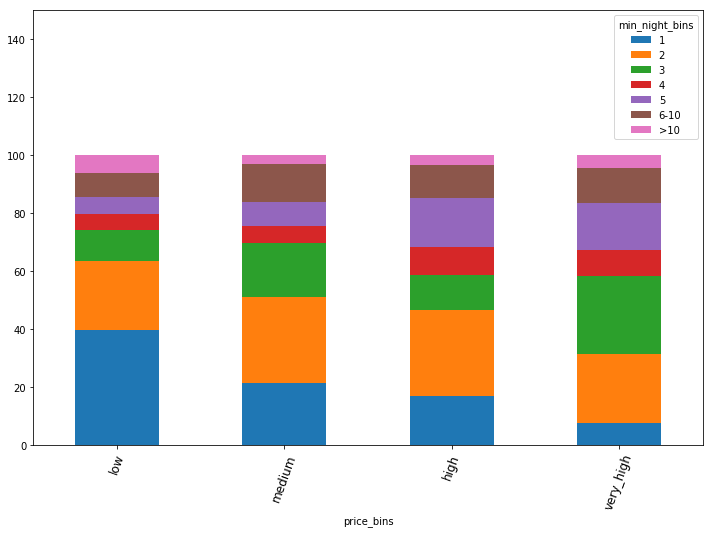

In [59]:
min_nig = min_nig.T
#f, ax = plt.subplots(figsize=(14,8))
min_nig.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.ylim(ymax = 150)
plt.xticks(rotation=70 , fontsize= 12)
plt.savefig('min_nig.png')
plt.show()

as the property price goes up, min nights is increases. Since good properties always look for long staying people. ence its a predictor

In [61]:
# Host listings is a indicator of brand. Airbnb hosts people who hosts multiple properties 
#which means they are serious business people. And other who have 1-2 are small players. Host having more listings
# increases credibiltiy
data['host_bins'] = pd.cut(data.host_total_listings_count , bins = [0,1,2,3,10,50,600] , labels= ['1','2','3','3-10','10-50','50-600'])
host =  pd.crosstab(data.host_bins,data.price_bins)
host_sum= host.sum(axis = 0)
host = host.loc[:,'low':'very_high'].div(host_sum,axis = 1)*100
host = host.T


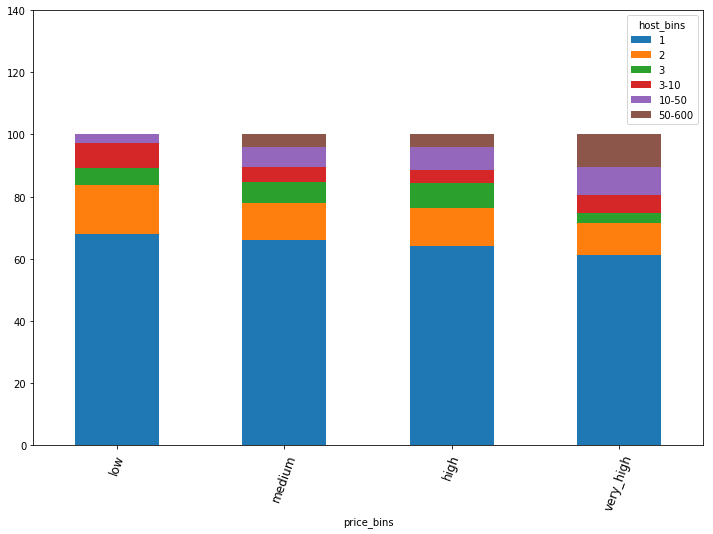

In [63]:

#f, ax = plt.subplots(figsize=(14,8))
host.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.ylim(ymax = 140)
plt.xticks(rotation=70 , fontsize= 12)
plt.savefig('host_listings_count.png')
plt.show()

There is no much variation among people who hosted 1 house. But hosts with high listings definitely demand high price Hence it is a predictor

### The property price is always dependent on how close it is to city tourist attractions. We have lat, long of properties. Hence we would like to measure distance from cities top 3 visited attractions cooge, manly and parra. This is accomplished by geopy package which when passed with lats and long of two places returns the distance. 

### For each property, we calculate average distance from three places in city and see if it can be a predictor. It is a generated feature

In [68]:
cooge = (-33.9190,151.2555)
# Manly beach
manly = (-33.7932,151.2876)
parra = (-33.8150,151.0011)


In [67]:
# function to cal dist. It takes each row, and calculates distance from 3 places and returns average. 
def dist(row):
    d1 = great_circle(cooge,(row['latitude'],row['longitude'])).kilometers
    d2 = great_circle(manly,(row['latitude'],row['longitude'])).kilometers
    d3 = great_circle(parra, (row['latitude'], row['longitude'])).kilometers
    return np.mean([d1,d2,d3])

In [69]:
data['avg_dist'] = data.apply(lambda x : dist(x),axis = 1)

In [70]:
data.head()
# see last column

,Id,accommodates,bathrooms,bedrooms,beds,cancellation_policy,cleaning_fee,extra_people,host_identity_verified,host_is_superhost,...,review_scores_rating,review_scores_value,reviews_per_month,room_type,security_deposit,price_bins,accom_bins,min_night_bins,host_bins,avg_dist
0,0,2,1.0,1.0,1.0,strict,330.0,0,t,f,...,100.0,10.0,0.53,Entire home/apt,500.0,medium,two,6-10,10-50,12.708850
1,1,2,1.5,1.0,1.0,flexible,0.0,0,t,f,...,0.0,0.0,0.00,Private room,0.0,low,two,>10,1,13.932346
2,2,4,2.0,2.0,2.0,moderate,180.0,0,t,t,...,99.0,9.0,2.38,Entire home/apt,500.0,very_high,3&4,3,1,12.777085
3,3,6,1.5,3.0,4.0,flexible,80.0,0,f,f,...,100.0,10.0,1.96,Entire home/apt,0.0,medium,>4,4,1,13.678804
4,4,4,1.0,2.0,2.0,moderate,85.0,50,t,f,...,97.0,10.0,2.73,Entire home/apt,350.0,medium,3&4,2,3-10,14.244064


In [71]:
# repeat above steps for diatnce dependence on price
data['avg_dist_bins'] = pd.cut(data.avg_dist, bins= [12.55,13.077,13.58,14.82,53.88])
di_ana = pd.crosstab(data.avg_dist_bins,data.price_bins)
dis_su= di_ana.sum(axis = 0)
di_ana = di_ana.loc[:,'low':'very_high'].div(dis_su,axis = 1)*100

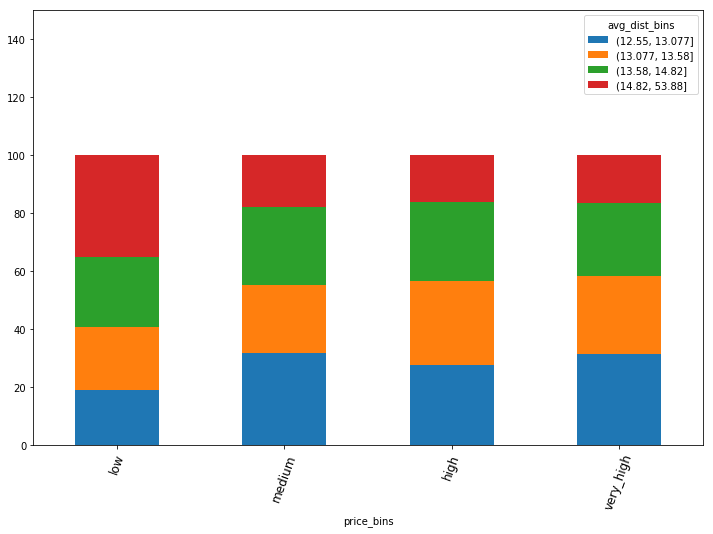

In [72]:
di_ana = di_ana.T
#f, ax = plt.subplots(figsize=(14,8))
di_ana.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.ylim(ymax = 150)
plt.xticks(rotation=70 , fontsize= 12)
plt.show()

You can clearly note that low price bins properties are far away from cities and lesser avg distance means higher pricing

# Modeling

In [74]:
data.host_is_superhost = data.host_is_superhost.cat.add_categories(['Missing'])
data.host_is_superhost.fillna(value ='Missing' , inplace= True)

data.host_identity_verified = data.host_identity_verified.cat.add_categories(['Missing'])
data.host_identity_verified.fillna('Missing' , inplace= True)

#imputing categiorical variable

In [84]:
cat_var = ['cancellation_policy','host_identity_verified','host_is_superhost','instant_bookable','is_business_travel_ready','property_type','room_type','min_night_bins','accom_bins']

num_var = ['bathrooms','bedrooms','beds','cleaning_fee','extra_people','host_total_listings_count','minimum_nights','number_of_reviews','reviews_per_month','security_deposit','review_scores_value','review_scores_accuracy']

#seperating numeric and categorical varibles

In [85]:
""" label encoding / dummies """
le = LabelEncoder()
data.loc[:,cat_var] = data.loc[:,cat_var].apply(lambda x : le.fit_transform(x), axis = 0 )
enc = OneHotEncoder(sparse= False)
encode = pd.DataFrame(enc.fit_transform(data.loc[:,cat_var]))

#label encoding for categorical

In [86]:
cat_features = []
for i, name in enumerate(cat_var):
    l = len(np.unique(data[name]))
    for k in range(l):
        f_nm = str(name) + '@' + str(k + 1)
        cat_features.append(f_nm)
all_features = cat_features + num_var

#getting index of all variables at one place for ffeature importances calculation

In [82]:
data.head()

,Id,accommodates,bathrooms,bedrooms,beds,cancellation_policy,cleaning_fee,extra_people,host_identity_verified,host_is_superhost,...,review_scores_value,reviews_per_month,room_type,security_deposit,price_bins,accom_bins,min_night_bins,host_bins,avg_dist,avg_dist_bins
0,0,2,1.0,1.0,1.0,strict,330.0,0,t,f,...,10.0,0.53,Entire home/apt,500.0,medium,two,6-10,10-50,12.708850,"(12.55, 13.077]"
1,1,2,1.5,1.0,1.0,flexible,0.0,0,t,f,...,0.0,0.00,Private room,0.0,low,two,greater 10,1,13.932346,"(13.58, 14.82]"
2,2,4,2.0,2.0,2.0,moderate,180.0,0,t,t,...,9.0,2.38,Entire home/apt,500.0,very_high,3&4,3,1,12.777085,"(12.55, 13.077]"
3,3,6,1.5,3.0,4.0,flexible,80.0,0,f,f,...,10.0,1.96,Entire home/apt,0.0,medium,>4,4,1,13.678804,"(13.58, 14.82]"
4,4,4,1.0,2.0,2.0,moderate,85.0,50,t,f,...,10.0,2.73,Entire home/apt,350.0,medium,3&4,2,3-10,14.244064,"(13.58, 14.82]"


In [87]:
""" scaling numerical variables """
#numeric = Imputer().fit_transform(trans_static.loc[:,num_var_list])
from sklearn.preprocessing import StandardScaler
numeric = data.loc[:,num_var]
#numeric  = pd.DataFrame(MinMaxScaler().fit_transform(numeric))
numeric  = pd.DataFrame(StandardScaler().fit_transform(numeric))


In [88]:
final_df = pd.concat([encode,numeric] , axis= 1)

In [89]:
#train and test split

x_train = final_df.head(1000)
y_train = train['price']
x_test = final_df.tail(7967)

# We had merged train and test in the beginning
# we are splitting accordingly now

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from math import sqrt



C:\Users\Prudhvi\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:
""" Random Forest model """

model = RandomForestRegressor(n_estimators=300 , max_features=8, max_depth= 80)
model.fit(x_train,y_train)
preds = model.predict(x_train)


In [93]:
model.score(x_train,y_train)
# model scored a adjusted R squared of 93%

0.9374450728571956

In [94]:
sqrt(mse(y_train,preds))

22.855735798180774

In [95]:
# RMSE error is 22.85
# which means on an avg our prediction price is 22 $ away from actual price. 